# L1, L2 normalization



In [1]:
from tensorflow import keras

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

from sklearn.metrics import confusion_matrix, f1_score

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [8]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [26]:
X_test.shape

(10000, 32, 32, 3)

In [20]:
X_train = X_train/255
X_train.shape

(50000, 32, 32, 3)

In [21]:
X_test = X_test/255
X_test.shape

(10000, 32, 32, 3)

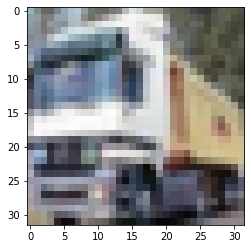

In [22]:
plt.imshow(X_train[1])

In [18]:
y_trainone = to_categorical(y_train)

In [19]:
y_trainone.shape

(50000, 10)

## kernel_regularizer 사용하기
- kernel_regularizer를 사용하면 cnn내부에서 정칙화를 사용할 수 있다.

In [3]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [ ]:
model = Sequential()

model.add( Conv2D( 32, kernel_size=(3,3), strides = 1 ,
                  input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 32, kernel_size =(3,3), activation='relu') )
model.add( MaxPool2D( pool_size=(2,2) ) )

model.add( Conv2D( 64, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 64, kernel_size =(3,3), activation='relu', kernel_regularizer = l2(0.001)) )
model.add( MaxPool2D( pool_size=(2,2) ) )

model.add( Conv2D( 128, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 128, kernel_size =(3,3), activation='relu', kernel_regularizer = l2(0.001)) )
model.add( MaxPool2D( pool_size=(2,2) ) )

model.add( Flatten( ) )

model.add( Dense( units=64, activation = 'relu', kernel_regularizer = l1_l2(0.001)) )
model.add( Dense( units=10, activation = 'softmax') )
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit( X_train, y_trainone, epochs=30, workers = -1, validation_split = 0.2)

Epoch 1/30
1250/1250 [==============================] - 13s 8ms/step - loss: 2.0005 - acc: 0.2847 - val_loss: 1.6505 - val_acc: 0.4172
Epoch 2/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5182 - acc: 0.4708 - val_loss: 1.4485 - val_acc: 0.4976
Epoch 3/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3193 - acc: 0.5542 - val_loss: 1.2435 - val_acc: 0.5870
Epoch 4/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2083 - acc: 0.6021 - val_loss: 1.1318 - val_acc: 0.6374
Epoch 5/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1195 - acc: 0.6422 - val_loss: 1.0787 - val_acc: 0.6555
Epoch 6/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0456 - acc: 0.6698 - val_loss: 1.0866 - val_acc: 0.6566
Epoch 7/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9942 - acc: 0.6885 - val_loss: 0.9814 - val_acc: 0.6954
Epoch 8/30
1250/1250 [==============================] - 9s 7m

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Dropout

In [4]:
from tensorflow.keras.layers import Dropout

## dropout 적용하기

In [ ]:
model = Sequential()

model.add( Conv2D( 32, kernel_size=(3,3), strides = 1 ,
                  input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 32, kernel_size =(3,3), activation='relu') )
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add( Dropout(0.2))

model.add( Conv2D( 64, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 64, kernel_size =(3,3), activation='relu', kernel_regularizer = l2(0.001)) )
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add( Dropout(0.2))

model.add( Conv2D( 128, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 128, kernel_size =(3,3), activation='relu', kernel_regularizer = l2(0.001)) )
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add(Dropout(0.2))

model.add( Flatten( ) )

model.add( Dense( units=64, activation = 'relu', kernel_regularizer = l1_l2(0.001)) )
model.add( Dense( units=10, activation = 'softmax') )
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit( X_train, y_trainone, epochs=50, workers = -1, validation_split = 0.2)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# batch normalization

- 순서: CON -> BATCHNORM-> ACTIVATION

In [5]:
from tensorflow.keras.layers import BatchNormalization, Activation

In [ ]:
model = Sequential()

model.add( Conv2D( 32, kernel_size=(3,3), strides = 1 ,
                  input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 32, kernel_size =(3,3), activation='relu') )
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add( Dropout(0.2))

model.add( Conv2D( 64, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 64, kernel_size =(3,3), activation='relu', kernel_regularizer = l2(0.001)) )
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add( Dropout(0.2))

model.add( Conv2D( 128, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 128, kernel_size =(3,3), activation='relu', kernel_regularizer = l2(0.001)) )
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add( Dropout(0.2))

model.add( Flatten( ) )

model.add( Dense( units=64, activation = 'relu', kernel_regularizer = l1_l2(0.001)) )
model.add( Dense( units=10, activation = 'softmax') )
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit( X_train, y_trainone, epochs=50, workers = -1, validation_split = 0.2)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# data augumentation

- 기존 데이터를 변형 시켜서 새로운 데이터를 만드는 방법

image generator에 data augmentation에 대한 method들이 많음

## 세부 방법

- width_shift_range
- height_shift_range
- brightness_range
-shear_range

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

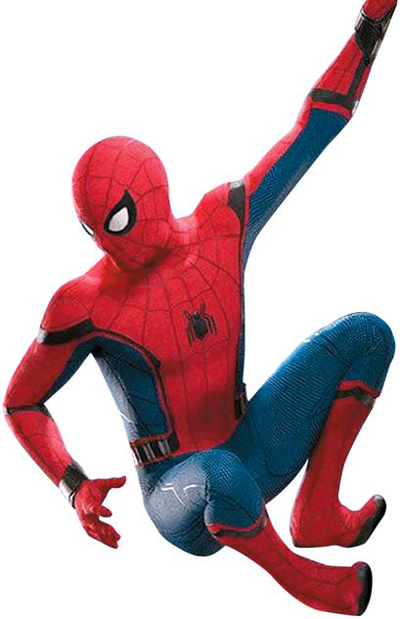

In [23]:
s= load_img('C:/Users/13a71/downloads/s.jpg')
s 

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                  )

In [25]:
imgarr = img_to_array(s)/255
imgarr = imgarr.reshape(1,619, 400,3)
imgarr.shape

(1, 619, 400, 3)

In [26]:
tgen = train_datagen.flow(imgarr)

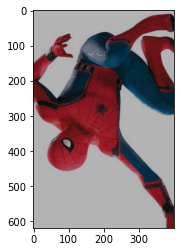

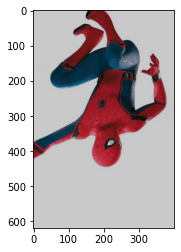

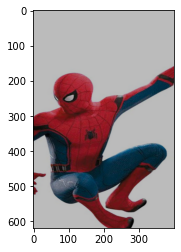

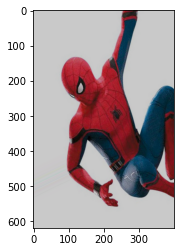

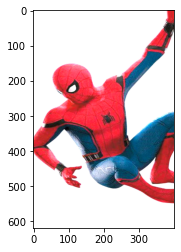

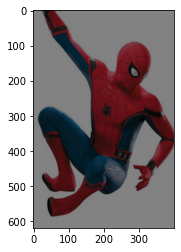

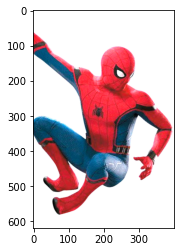

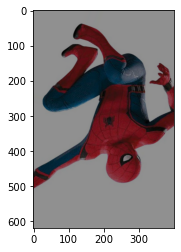

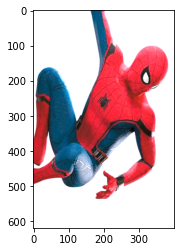

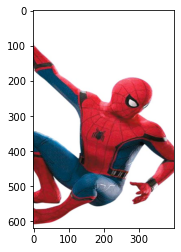

In [27]:
for n in range( 10 ):
    img = tgen.next()
    plt.imshow( img[0])
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3)

#따라서 np.squeeze를 사용해서 마지막 차원을 제거.
# y_train의 경우 (35000, 1) -> (35000, )
y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)

In [12]:
traingen = train_datagen.flow(x_train, y_train)

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
testgen = test_datagen.flow(x_val, y_val)

In [ ]:
model = Sequential()

model.add( Conv2D( 32, kernel_size=(3,3), strides = 1 ,
                  input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 32, kernel_size =(3,3), activation='relu') )
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add( Dropout(0.2))

model.add( Conv2D( 64, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 64, kernel_size =(3,3), activation='relu', kernel_regularizer = l2(0.001)) )
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add( Dropout(0.2))

model.add( Conv2D( 128, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 128, kernel_size =(3,3), activation='relu', kernel_regularizer = l2(0.001)) )
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add( Dropout(0.2))

model.add( Flatten( ) )

model.add( Dense( units=64, activation = 'relu', kernel_regularizer = l1_l2(0.001)) )
model.add( Dense( units=10, activation = 'softmax') )
model.compile( loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
## fit에 generator를 넣어도 된다.
history = model.fit(traingen, epochs=50, workers = -1, validation_data= testgen)

Epoch 1/50
1094/1094 [==============================] - 32s 27ms/step - loss: 2.6852 - acc: 0.2895 - val_loss: 1.9290 - val_acc: 0.3803
Epoch 2/50
1094/1094 [==============================] - 29s 27ms/step - loss: 1.8878 - acc: 0.3778 - val_loss: 1.8172 - val_acc: 0.3870
Epoch 3/50
1094/1094 [==============================] - 29s 26ms/step - loss: 1.7657 - acc: 0.4183 - val_loss: 2.1197 - val_acc: 0.3360
Epoch 4/50
1094/1094 [==============================] - 29s 26ms/step - loss: 1.6948 - acc: 0.4458 - val_loss: 1.5088 - val_acc: 0.5108
Epoch 5/50
1094/1094 [==============================] - 30s 27ms/step - loss: 1.6253 - acc: 0.4728 - val_loss: 1.4720 - val_acc: 0.5319
Epoch 6/50
1094/1094 [==============================] - 29s 27ms/step - loss: 1.5899 - acc: 0.4873 - val_loss: 1.4667 - val_acc: 0.5311
Epoch 7/50
1094/1094 [==============================] - 29s 26ms/step - loss: 1.5408 - acc: 0.5082 - val_loss: 1.4801 - val_acc: 0.5337
Epoch 8/50
1094/1094 [==========================